In [1]:
# IMPORTANTE
# TODO: tentar uma unica variaval para ruptura

# ranqueamento das lojas
# se tiver presenca e eu marquei pontos la em cima, poderia contar como erro.

# Historico
- Rede dupla e/ou com 100 neuronios: ruim. Nos primeiros passos o resultado fica razoavel, mas quando avanca piora.
- Rede unica com 10 neuronios: bom.

In [1]:
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
import sys 
import json
import numpy as np # linear algebra
import matplotlib.pyplot as plt # this is used for the plot the graph 
import math
import collections
import pandas as pd

## for Deep-learing:
import keras
import tensorflow as tf
from keras import backend as K
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Lambda
from keras.models import model_from_json
from tensorflow.python.keras.callbacks import TensorBoard

from itertools import product
from functools import partial
from time import time

from core.DataExploration import DataExploration
from core.ModelIndicators import ModelIndicators
from ruptura.CreateBatch import CreateBatch
from ruptura.RupturaPrediction import RupturaPrediction
from ruptura.RupturaNeuralNetwork import RupturaNeuralNetwork

Using TensorFlow backend.


In [2]:
version = '0-0-4'
referenceDate = '1/03/2019'
modelName = 'model-' + version

# CARREGAMENTO DOS DADOS

In [3]:
createBatch = CreateBatch(version)
X, Y, Ytest, lastX = createBatch.batch('barbieri-lastX.json')

WARNING - need error handling on samples


# MODEL DEFINITION

In [4]:
batch_size = 64
weightVector = [1,1,0.1]
time_steps = X.shape[1]
x_dimension = X.shape[2]
y_dimension = Y.shape[2]
rupNN = RupturaNeuralNetwork(modelName)
newModel = True

if newModel:
    n_neurons = 12
    model = Sequential()
    model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    model.add(TimeDistributed(Dense(y_dimension, activation='softmax')))
    #model.add(LSTM(n_neurons, input_shape=(time_steps, x_dimension), return_sequences=True)) 
    #model.add(TimeDistributed(Dense(x_dimension, activation='softmax')))
    model.compile(
        loss=rupNN.getCustomLoss((batch_size,time_steps), weightVector),
        optimizer='adam')
    print('MODEL CREATED\n')
    print(model.summary())
else:
    model = rupNN.loadModel((batch_size,time_steps))  # Y dimensions are needed for custom loss definitions
    print('MODEL LOADED\n')
    print(model.summary())

TypeError: getCustomLoss() takes 2 positional arguments but 3 were given

# TRAINING

In [6]:
cut1 = batch_size
cut2 = X.shape[0] - X.shape[0]%batch_size
Xval, Xtrain,_ = np.split(X,[cut1,cut2])
Yval, Ytrain,_ = np.split(Y,[cut1,cut2])
for step in range(30):
    n_epoch = 100
    model.fit(Xtrain, Ytrain, 
                  epochs=n_epoch, 
                  batch_size= batch_size, 
                  validation_data=(Xval, Yval),
                  verbose=2)
    rupNN.saveModel(model)

Train on 2304 samples, validate on 64 samples
Epoch 1/100
 - 8s - loss: 0.3737 - val_loss: 0.3942
Epoch 2/100
 - 6s - loss: 0.3448 - val_loss: 0.3775
Epoch 3/100
 - 6s - loss: 0.3315 - val_loss: 0.3693
Epoch 4/100
 - 6s - loss: 0.3180 - val_loss: 0.3389
Epoch 5/100
 - 6s - loss: 0.3012 - val_loss: 0.3260
Epoch 6/100
 - 6s - loss: 0.2948 - val_loss: 0.3212
Epoch 7/100
 - 6s - loss: 0.2913 - val_loss: 0.3183
Epoch 8/100
 - 6s - loss: 0.2891 - val_loss: 0.3177
Epoch 9/100
 - 6s - loss: 0.2873 - val_loss: 0.3148
Epoch 10/100
 - 6s - loss: 0.2855 - val_loss: 0.3130
Epoch 11/100
 - 6s - loss: 0.2838 - val_loss: 0.3121
Epoch 12/100
 - 6s - loss: 0.2822 - val_loss: 0.3102
Epoch 13/100
 - 6s - loss: 0.2804 - val_loss: 0.3085
Epoch 14/100
 - 6s - loss: 0.2786 - val_loss: 0.3061
Epoch 15/100
 - 6s - loss: 0.2767 - val_loss: 0.3044
Epoch 16/100
 - 6s - loss: 0.2745 - val_loss: 0.3026
Epoch 17/100
 - 6s - loss: 0.2722 - val_loss: 0.3004
Epoch 18/100
 - 6s - loss: 0.2699 - val_loss: 0.2990
Epoch 19/

 - 6s - loss: 0.2239 - val_loss: 0.2472
Epoch 55/100
 - 6s - loss: 0.2228 - val_loss: 0.2468
Epoch 56/100
 - 6s - loss: 0.2224 - val_loss: 0.2468
Epoch 57/100
 - 6s - loss: 0.2224 - val_loss: 0.2459
Epoch 58/100
 - 6s - loss: 0.2223 - val_loss: 0.2465
Epoch 59/100
 - 6s - loss: 0.2220 - val_loss: 0.2447
Epoch 60/100
 - 6s - loss: 0.2220 - val_loss: 0.2464
Epoch 61/100
 - 6s - loss: 0.2219 - val_loss: 0.2478
Epoch 62/100
 - 6s - loss: 0.2214 - val_loss: 0.2445
Epoch 63/100
 - 6s - loss: 0.2214 - val_loss: 0.2438
Epoch 64/100
 - 6s - loss: 0.2211 - val_loss: 0.2442
Epoch 65/100
 - 6s - loss: 0.2210 - val_loss: 0.2441
Epoch 66/100
 - 6s - loss: 0.2212 - val_loss: 0.2433
Epoch 67/100
 - 6s - loss: 0.2206 - val_loss: 0.2434
Epoch 68/100
 - 6s - loss: 0.2204 - val_loss: 0.2446
Epoch 69/100
 - 6s - loss: 0.2202 - val_loss: 0.2437
Epoch 70/100
 - 6s - loss: 0.2203 - val_loss: 0.2432
Epoch 71/100
 - 6s - loss: 0.2199 - val_loss: 0.2426
Epoch 72/100
 - 6s - loss: 0.2200 - val_loss: 0.2433
Epoch 

Epoch 8/100
 - 6s - loss: 0.2073 - val_loss: 0.2322
Epoch 9/100
 - 6s - loss: 0.2072 - val_loss: 0.2317
Epoch 10/100
 - 6s - loss: 0.2072 - val_loss: 0.2323
Epoch 11/100
 - 6s - loss: 0.2070 - val_loss: 0.2319
Epoch 12/100
 - 6s - loss: 0.2073 - val_loss: 0.2326
Epoch 13/100
 - 6s - loss: 0.2069 - val_loss: 0.2326
Epoch 14/100
 - 6s - loss: 0.2068 - val_loss: 0.2329
Epoch 15/100
 - 6s - loss: 0.2074 - val_loss: 0.2322
Epoch 16/100
 - 6s - loss: 0.2070 - val_loss: 0.2320
Epoch 17/100
 - 6s - loss: 0.2075 - val_loss: 0.2326
Epoch 18/100
 - 6s - loss: 0.2068 - val_loss: 0.2321
Epoch 19/100
 - 6s - loss: 0.2067 - val_loss: 0.2324
Epoch 20/100
 - 6s - loss: 0.2068 - val_loss: 0.2316
Epoch 21/100
 - 6s - loss: 0.2071 - val_loss: 0.2337
Epoch 22/100
 - 6s - loss: 0.2067 - val_loss: 0.2309
Epoch 23/100
 - 6s - loss: 0.2068 - val_loss: 0.2308
Epoch 24/100
 - 6s - loss: 0.2064 - val_loss: 0.2314
Epoch 25/100
 - 6s - loss: 0.2067 - val_loss: 0.2315
Epoch 26/100
 - 6s - loss: 0.2064 - val_loss: 0.

Epoch 62/100
 - 6s - loss: 0.2027 - val_loss: 0.2291
Epoch 63/100
 - 6s - loss: 0.2019 - val_loss: 0.2279
Epoch 64/100
 - 6s - loss: 0.2017 - val_loss: 0.2297
Epoch 65/100
 - 6s - loss: 0.2017 - val_loss: 0.2291
Epoch 66/100
 - 6s - loss: 0.2018 - val_loss: 0.2293
Epoch 67/100
 - 6s - loss: 0.2018 - val_loss: 0.2299
Epoch 68/100
 - 6s - loss: 0.2017 - val_loss: 0.2298
Epoch 69/100
 - 6s - loss: 0.2017 - val_loss: 0.2289
Epoch 70/100
 - 6s - loss: 0.2022 - val_loss: 0.2317
Epoch 71/100
 - 6s - loss: 0.2023 - val_loss: 0.2296
Epoch 72/100
 - 6s - loss: 0.2021 - val_loss: 0.2294
Epoch 73/100
 - 6s - loss: 0.2017 - val_loss: 0.2292
Epoch 74/100
 - 6s - loss: 0.2016 - val_loss: 0.2310
Epoch 75/100
 - 6s - loss: 0.2020 - val_loss: 0.2290
Epoch 76/100
 - 6s - loss: 0.2022 - val_loss: 0.2312
Epoch 77/100
 - 6s - loss: 0.2021 - val_loss: 0.2289
Epoch 78/100
 - 6s - loss: 0.2022 - val_loss: 0.2306
Epoch 79/100
 - 6s - loss: 0.2024 - val_loss: 0.2301
Epoch 80/100
 - 6s - loss: 0.2020 - val_loss: 

 - 6s - loss: 0.1987 - val_loss: 0.2275
Epoch 16/100
 - 6s - loss: 0.1986 - val_loss: 0.2269
Epoch 17/100
 - 6s - loss: 0.1988 - val_loss: 0.2270
Epoch 18/100
 - 6s - loss: 0.1991 - val_loss: 0.2273
Epoch 19/100
 - 6s - loss: 0.1988 - val_loss: 0.2272
Epoch 20/100
 - 6s - loss: 0.1981 - val_loss: 0.2269
Epoch 21/100
 - 6s - loss: 0.1984 - val_loss: 0.2271
Epoch 22/100
 - 6s - loss: 0.1987 - val_loss: 0.2283
Epoch 23/100
 - 6s - loss: 0.1985 - val_loss: 0.2280
Epoch 24/100
 - 6s - loss: 0.1980 - val_loss: 0.2267
Epoch 25/100
 - 6s - loss: 0.1982 - val_loss: 0.2271
Epoch 26/100
 - 6s - loss: 0.1983 - val_loss: 0.2267
Epoch 27/100
 - 6s - loss: 0.1981 - val_loss: 0.2254
Epoch 28/100
 - 6s - loss: 0.1982 - val_loss: 0.2259
Epoch 29/100
 - 6s - loss: 0.1981 - val_loss: 0.2264
Epoch 30/100
 - 6s - loss: 0.1982 - val_loss: 0.2273
Epoch 31/100
 - 6s - loss: 0.1981 - val_loss: 0.2282
Epoch 32/100
 - 6s - loss: 0.1979 - val_loss: 0.2269
Epoch 33/100
 - 6s - loss: 0.1980 - val_loss: 0.2260
Epoch 

 - 6s - loss: 0.1961 - val_loss: 0.2245
Epoch 70/100
 - 6s - loss: 0.1961 - val_loss: 0.2245
Epoch 71/100
 - 6s - loss: 0.1956 - val_loss: 0.2245
Epoch 72/100
 - 6s - loss: 0.1956 - val_loss: 0.2239
Epoch 73/100
 - 6s - loss: 0.1961 - val_loss: 0.2247
Epoch 74/100
 - 6s - loss: 0.1958 - val_loss: 0.2248
Epoch 75/100
 - 6s - loss: 0.1959 - val_loss: 0.2240
Epoch 76/100
 - 6s - loss: 0.1959 - val_loss: 0.2253
Epoch 77/100
 - 6s - loss: 0.1958 - val_loss: 0.2247
Epoch 78/100
 - 6s - loss: 0.1959 - val_loss: 0.2248
Epoch 79/100
 - 6s - loss: 0.1957 - val_loss: 0.2237
Epoch 80/100
 - 6s - loss: 0.1955 - val_loss: 0.2255
Epoch 81/100
 - 6s - loss: 0.1956 - val_loss: 0.2248
Epoch 82/100
 - 6s - loss: 0.1957 - val_loss: 0.2246
Epoch 83/100
 - 6s - loss: 0.1955 - val_loss: 0.2244
Epoch 84/100
 - 6s - loss: 0.1960 - val_loss: 0.2258
Epoch 85/100
 - 6s - loss: 0.1967 - val_loss: 0.2244
Epoch 86/100
 - 6s - loss: 0.1961 - val_loss: 0.2272
Epoch 87/100
 - 6s - loss: 0.1961 - val_loss: 0.2245
Epoch 

Epoch 23/100
 - 6s - loss: 0.1936 - val_loss: 0.2237
Epoch 24/100
 - 6s - loss: 0.1936 - val_loss: 0.2252
Epoch 25/100
 - 6s - loss: 0.1936 - val_loss: 0.2232
Epoch 26/100
 - 6s - loss: 0.1936 - val_loss: 0.2225
Epoch 27/100
 - 6s - loss: 0.1935 - val_loss: 0.2223
Epoch 28/100
 - 6s - loss: 0.1937 - val_loss: 0.2249
Epoch 29/100
 - 6s - loss: 0.1940 - val_loss: 0.2238
Epoch 30/100
 - 6s - loss: 0.1936 - val_loss: 0.2230
Epoch 31/100
 - 6s - loss: 0.1937 - val_loss: 0.2237
Epoch 32/100
 - 6s - loss: 0.1969 - val_loss: 0.2236
Epoch 33/100
 - 6s - loss: 0.1948 - val_loss: 0.2245
Epoch 34/100
 - 6s - loss: 0.1943 - val_loss: 0.2231
Epoch 35/100
 - 6s - loss: 0.1941 - val_loss: 0.2233
Epoch 36/100
 - 6s - loss: 0.1938 - val_loss: 0.2225
Epoch 37/100
 - 6s - loss: 0.1936 - val_loss: 0.2225
Epoch 38/100
 - 6s - loss: 0.1938 - val_loss: 0.2228
Epoch 39/100
 - 6s - loss: 0.1935 - val_loss: 0.2255
Epoch 40/100
 - 6s - loss: 0.1935 - val_loss: 0.2246
Epoch 41/100
 - 6s - loss: 0.1935 - val_loss: 

Epoch 77/100
 - 6s - loss: 0.1919 - val_loss: 0.2235
Epoch 78/100
 - 6s - loss: 0.1920 - val_loss: 0.2241
Epoch 79/100
 - 6s - loss: 0.1920 - val_loss: 0.2229
Epoch 80/100
 - 6s - loss: 0.1919 - val_loss: 0.2247
Epoch 81/100
 - 6s - loss: 0.1920 - val_loss: 0.2236
Epoch 82/100
 - 6s - loss: 0.1918 - val_loss: 0.2223
Epoch 83/100
 - 6s - loss: 0.1918 - val_loss: 0.2216
Epoch 84/100
 - 6s - loss: 0.1920 - val_loss: 0.2237
Epoch 85/100
 - 6s - loss: 0.1919 - val_loss: 0.2250
Epoch 86/100
 - 6s - loss: 0.1924 - val_loss: 0.2231
Epoch 87/100
 - 6s - loss: 0.1919 - val_loss: 0.2245
Epoch 88/100
 - 6s - loss: 0.1921 - val_loss: 0.2245
Epoch 89/100
 - 6s - loss: 0.1916 - val_loss: 0.2227
Epoch 90/100
 - 6s - loss: 0.1919 - val_loss: 0.2226
Epoch 91/100
 - 6s - loss: 0.1918 - val_loss: 0.2245
Epoch 92/100
 - 6s - loss: 0.1917 - val_loss: 0.2241
Epoch 93/100
 - 6s - loss: 0.1917 - val_loss: 0.2236
Epoch 94/100
 - 6s - loss: 0.1918 - val_loss: 0.2249
Epoch 95/100
 - 6s - loss: 0.1917 - val_loss: 

 - 6s - loss: 0.1914 - val_loss: 0.2256
Epoch 31/100
 - 6s - loss: 0.1915 - val_loss: 0.2248
Epoch 32/100
 - 6s - loss: 0.1918 - val_loss: 0.2239
Epoch 33/100
 - 6s - loss: 0.1912 - val_loss: 0.2232
Epoch 34/100
 - 6s - loss: 0.1913 - val_loss: 0.2234
Epoch 35/100
 - 6s - loss: 0.1910 - val_loss: 0.2238
Epoch 36/100
 - 6s - loss: 0.1909 - val_loss: 0.2234
Epoch 37/100
 - 6s - loss: 0.1909 - val_loss: 0.2227
Epoch 38/100
 - 6s - loss: 0.1910 - val_loss: 0.2224
Epoch 39/100
 - 6s - loss: 0.1911 - val_loss: 0.2243
Epoch 40/100
 - 6s - loss: 0.1913 - val_loss: 0.2233
Epoch 41/100
 - 6s - loss: 0.1911 - val_loss: 0.2223
Epoch 42/100
 - 6s - loss: 0.1907 - val_loss: 0.2224
Epoch 43/100
 - 6s - loss: 0.1911 - val_loss: 0.2244
Epoch 44/100
 - 6s - loss: 0.1920 - val_loss: 0.2227
Epoch 45/100
 - 6s - loss: 0.1911 - val_loss: 0.2239
Epoch 46/100
 - 6s - loss: 0.1911 - val_loss: 0.2220
Epoch 47/100
 - 6s - loss: 0.1910 - val_loss: 0.2231
Epoch 48/100
 - 6s - loss: 0.1908 - val_loss: 0.2238
Epoch 

 - 6s - loss: 0.1898 - val_loss: 0.2216
Epoch 85/100
 - 6s - loss: 0.1909 - val_loss: 0.2229
Epoch 86/100
 - 6s - loss: 0.1906 - val_loss: 0.2214
Epoch 87/100
 - 6s - loss: 0.1905 - val_loss: 0.2237
Epoch 88/100
 - 6s - loss: 0.1903 - val_loss: 0.2219
Epoch 89/100
 - 6s - loss: 0.1901 - val_loss: 0.2221
Epoch 90/100
 - 6s - loss: 0.1901 - val_loss: 0.2224
Epoch 91/100
 - 6s - loss: 0.1909 - val_loss: 0.2225
Epoch 92/100
 - 6s - loss: 0.1909 - val_loss: 0.2220
Epoch 93/100
 - 6s - loss: 0.1903 - val_loss: 0.2218
Epoch 94/100
 - 6s - loss: 0.1902 - val_loss: 0.2214
Epoch 95/100
 - 6s - loss: 0.1898 - val_loss: 0.2208
Epoch 96/100
 - 6s - loss: 0.1901 - val_loss: 0.2211
Epoch 97/100
 - 6s - loss: 0.1902 - val_loss: 0.2220
Epoch 98/100
 - 6s - loss: 0.1913 - val_loss: 0.2225
Epoch 99/100
 - 6s - loss: 0.1906 - val_loss: 0.2213
Epoch 100/100
 - 6s - loss: 0.1898 - val_loss: 0.2208
Train on 2304 samples, validate on 64 samples
Epoch 1/100
 - 6s - loss: 0.1898 - val_loss: 0.2224
Epoch 2/100
 

Epoch 38/100
 - 6s - loss: 0.1890 - val_loss: 0.2204
Epoch 39/100
 - 6s - loss: 0.1890 - val_loss: 0.2211
Epoch 40/100
 - 6s - loss: 0.1889 - val_loss: 0.2204
Epoch 41/100
 - 6s - loss: 0.1888 - val_loss: 0.2215
Epoch 42/100
 - 6s - loss: 0.1891 - val_loss: 0.2207
Epoch 43/100
 - 6s - loss: 0.1889 - val_loss: 0.2219
Epoch 44/100
 - 6s - loss: 0.1889 - val_loss: 0.2198
Epoch 45/100
 - 6s - loss: 0.1895 - val_loss: 0.2231
Epoch 46/100
 - 6s - loss: 0.1892 - val_loss: 0.2201
Epoch 47/100
 - 6s - loss: 0.1892 - val_loss: 0.2217
Epoch 48/100
 - 6s - loss: 0.1893 - val_loss: 0.2247
Epoch 49/100
 - 6s - loss: 0.2207 - val_loss: 0.2392
Epoch 50/100
 - 6s - loss: 0.1989 - val_loss: 0.2231
Epoch 51/100
 - 6s - loss: 0.1919 - val_loss: 0.2223
Epoch 52/100
 - 6s - loss: 0.1906 - val_loss: 0.2218
Epoch 53/100
 - 6s - loss: 0.1898 - val_loss: 0.2215
Epoch 54/100
 - 6s - loss: 0.1893 - val_loss: 0.2196
Epoch 55/100
 - 6s - loss: 0.1894 - val_loss: 0.2203
Epoch 56/100
 - 6s - loss: 0.1889 - val_loss: 

Epoch 92/100
 - 6s - loss: 0.1882 - val_loss: 0.2231
Epoch 93/100
 - 6s - loss: 0.1885 - val_loss: 0.2190
Epoch 94/100
 - 6s - loss: 0.1883 - val_loss: 0.2223
Epoch 95/100
 - 6s - loss: 0.1884 - val_loss: 0.2199
Epoch 96/100
 - 6s - loss: 0.1880 - val_loss: 0.2203
Epoch 97/100
 - 6s - loss: 0.1882 - val_loss: 0.2203
Epoch 98/100
 - 6s - loss: 0.1879 - val_loss: 0.2187
Epoch 99/100
 - 6s - loss: 0.1885 - val_loss: 0.2194
Epoch 100/100
 - 6s - loss: 0.1880 - val_loss: 0.2201
Train on 2304 samples, validate on 64 samples
Epoch 1/100
 - 6s - loss: 0.1885 - val_loss: 0.2210
Epoch 2/100
 - 6s - loss: 0.1880 - val_loss: 0.2210
Epoch 3/100
 - 6s - loss: 0.1880 - val_loss: 0.2199
Epoch 4/100
 - 6s - loss: 0.1879 - val_loss: 0.2187
Epoch 5/100
 - 6s - loss: 0.1877 - val_loss: 0.2195
Epoch 6/100
 - 6s - loss: 0.1886 - val_loss: 0.2184
Epoch 7/100
 - 6s - loss: 0.1882 - val_loss: 0.2203
Epoch 8/100
 - 6s - loss: 0.1879 - val_loss: 0.2196
Epoch 9/100
 - 6s - loss: 0.1877 - val_loss: 0.2196
Epoch 10

 - 6s - loss: 0.1870 - val_loss: 0.2179
Epoch 46/100
 - 6s - loss: 0.1870 - val_loss: 0.2178
Epoch 47/100
 - 6s - loss: 0.1871 - val_loss: 0.2185
Epoch 48/100
 - 6s - loss: 0.1885 - val_loss: 0.2211
Epoch 49/100
 - 6s - loss: 0.1882 - val_loss: 0.2205
Epoch 50/100
 - 6s - loss: 0.1882 - val_loss: 0.2183
Epoch 51/100
 - 6s - loss: 0.1879 - val_loss: 0.2182
Epoch 52/100
 - 6s - loss: 0.1880 - val_loss: 0.2184
Epoch 53/100
 - 6s - loss: 0.1889 - val_loss: 0.2212
Epoch 54/100
 - 6s - loss: 0.1887 - val_loss: 0.2196
Epoch 55/100
 - 6s - loss: 0.1878 - val_loss: 0.2192
Epoch 56/100
 - 6s - loss: 0.1876 - val_loss: 0.2204
Epoch 57/100
 - 6s - loss: 0.1883 - val_loss: 0.2207
Epoch 58/100
 - 6s - loss: 0.1872 - val_loss: 0.2189
Epoch 59/100
 - 6s - loss: 0.1875 - val_loss: 0.2194
Epoch 60/100
 - 6s - loss: 0.1882 - val_loss: 0.2187
Epoch 61/100
 - 6s - loss: 0.1877 - val_loss: 0.2195
Epoch 62/100
 - 6s - loss: 0.1874 - val_loss: 0.2178
Epoch 63/100
 - 6s - loss: 0.1879 - val_loss: 0.2188
Epoch 

 - 6s - loss: 0.1866 - val_loss: 0.2174
Epoch 100/100
 - 6s - loss: 0.1864 - val_loss: 0.2185
Train on 2304 samples, validate on 64 samples
Epoch 1/100
 - 6s - loss: 0.1863 - val_loss: 0.2209
Epoch 2/100
 - 6s - loss: 0.1865 - val_loss: 0.2174
Epoch 3/100
 - 6s - loss: 0.1870 - val_loss: 0.2169
Epoch 4/100
 - 6s - loss: 0.1870 - val_loss: 0.2175
Epoch 5/100
 - 6s - loss: 0.1863 - val_loss: 0.2173
Epoch 6/100
 - 6s - loss: 0.1864 - val_loss: 0.2166
Epoch 7/100
 - 6s - loss: 0.1863 - val_loss: 0.2179
Epoch 8/100
 - 6s - loss: 0.1864 - val_loss: 0.2176
Epoch 9/100
 - 6s - loss: 0.1866 - val_loss: 0.2176
Epoch 10/100
 - 6s - loss: 0.1869 - val_loss: 0.2197
Epoch 11/100
 - 6s - loss: 0.1866 - val_loss: 0.2181
Epoch 12/100
 - 6s - loss: 0.1867 - val_loss: 0.2183
Epoch 13/100
 - 6s - loss: 0.1867 - val_loss: 0.2185
Epoch 14/100
 - 6s - loss: 0.1862 - val_loss: 0.2168
Epoch 15/100
 - 6s - loss: 0.1865 - val_loss: 0.2170
Epoch 16/100
 - 6s - loss: 0.1861 - val_loss: 0.2178
Epoch 17/100
 - 6s - 

Epoch 53/100
 - 6s - loss: 0.1857 - val_loss: 0.2174
Epoch 54/100
 - 6s - loss: 0.1861 - val_loss: 0.2177
Epoch 55/100
 - 6s - loss: 0.1862 - val_loss: 0.2185
Epoch 56/100
 - 6s - loss: 0.1857 - val_loss: 0.2178
Epoch 57/100
 - 6s - loss: 0.1859 - val_loss: 0.2173
Epoch 58/100
 - 6s - loss: 0.1856 - val_loss: 0.2171
Epoch 59/100
 - 6s - loss: 0.1858 - val_loss: 0.2167
Epoch 60/100
 - 6s - loss: 0.1855 - val_loss: 0.2188
Epoch 61/100
 - 6s - loss: 0.1857 - val_loss: 0.2173
Epoch 62/100
 - 6s - loss: 0.1855 - val_loss: 0.2172
Epoch 63/100
 - 6s - loss: 0.1855 - val_loss: 0.2170
Epoch 64/100
 - 6s - loss: 0.1859 - val_loss: 0.2177
Epoch 65/100
 - 6s - loss: 0.1855 - val_loss: 0.2179
Epoch 66/100
 - 6s - loss: 0.1859 - val_loss: 0.2187
Epoch 67/100
 - 6s - loss: 0.1863 - val_loss: 0.2187
Epoch 68/100
 - 6s - loss: 0.1868 - val_loss: 0.2183
Epoch 69/100
 - 6s - loss: 0.1859 - val_loss: 0.2180
Epoch 70/100
 - 6s - loss: 0.1860 - val_loss: 0.2192
Epoch 71/100
 - 6s - loss: 0.1872 - val_loss: 

 - 6s - loss: 0.1851 - val_loss: 0.2174
Epoch 7/100
 - 6s - loss: 0.1859 - val_loss: 0.2177
Epoch 8/100
 - 6s - loss: 0.1863 - val_loss: 0.2180
Epoch 9/100
 - 6s - loss: 0.1861 - val_loss: 0.2192
Epoch 10/100
 - 6s - loss: 0.1855 - val_loss: 0.2174
Epoch 11/100
 - 6s - loss: 0.1857 - val_loss: 0.2195
Epoch 12/100
 - 6s - loss: 0.1857 - val_loss: 0.2158
Epoch 13/100
 - 6s - loss: 0.1853 - val_loss: 0.2172
Epoch 14/100
 - 6s - loss: 0.1851 - val_loss: 0.2166
Epoch 15/100
 - 6s - loss: 0.1851 - val_loss: 0.2160
Epoch 16/100
 - 6s - loss: 0.1852 - val_loss: 0.2167
Epoch 17/100
 - 6s - loss: 0.1850 - val_loss: 0.2175
Epoch 18/100
 - 6s - loss: 0.1851 - val_loss: 0.2174
Epoch 19/100
 - 6s - loss: 0.1850 - val_loss: 0.2170
Epoch 20/100
 - 6s - loss: 0.1850 - val_loss: 0.2169
Epoch 21/100
 - 6s - loss: 0.1851 - val_loss: 0.2177
Epoch 22/100
 - 6s - loss: 0.1849 - val_loss: 0.2189
Epoch 23/100
 - 6s - loss: 0.1852 - val_loss: 0.2167
Epoch 24/100
 - 6s - loss: 0.1852 - val_loss: 0.2162
Epoch 25/

 - 6s - loss: 0.1855 - val_loss: 0.2156
Epoch 61/100
 - 6s - loss: 0.1859 - val_loss: 0.2187
Epoch 62/100
 - 6s - loss: 0.1864 - val_loss: 0.2191
Epoch 63/100
 - 6s - loss: 0.1852 - val_loss: 0.2160
Epoch 64/100
 - 6s - loss: 0.1846 - val_loss: 0.2169
Epoch 65/100
 - 6s - loss: 0.1846 - val_loss: 0.2161
Epoch 66/100
 - 6s - loss: 0.1845 - val_loss: 0.2154
Epoch 67/100
 - 6s - loss: 0.1848 - val_loss: 0.2162
Epoch 68/100
 - 6s - loss: 0.1848 - val_loss: 0.2170
Epoch 69/100
 - 6s - loss: 0.1846 - val_loss: 0.2157
Epoch 70/100
 - 6s - loss: 0.1845 - val_loss: 0.2165
Epoch 71/100
 - 6s - loss: 0.1847 - val_loss: 0.2168
Epoch 72/100
 - 6s - loss: 0.1844 - val_loss: 0.2156
Epoch 73/100
 - 6s - loss: 0.1847 - val_loss: 0.2189
Epoch 74/100
 - 6s - loss: 0.1846 - val_loss: 0.2160
Epoch 75/100
 - 6s - loss: 0.1850 - val_loss: 0.2159
Epoch 76/100
 - 6s - loss: 0.1846 - val_loss: 0.2167
Epoch 77/100
 - 6s - loss: 0.1845 - val_loss: 0.2163
Epoch 78/100
 - 6s - loss: 0.1848 - val_loss: 0.2168
Epoch 

Epoch 14/100
 - 6s - loss: 0.1845 - val_loss: 0.2206
Epoch 15/100
 - 6s - loss: 0.1841 - val_loss: 0.2165
Epoch 16/100
 - 6s - loss: 0.1850 - val_loss: 0.2157
Epoch 17/100
 - 6s - loss: 0.1846 - val_loss: 0.2175
Epoch 18/100
 - 6s - loss: 0.1849 - val_loss: 0.2164
Epoch 19/100
 - 6s - loss: 0.1844 - val_loss: 0.2165
Epoch 20/100
 - 6s - loss: 0.1840 - val_loss: 0.2156
Epoch 21/100
 - 6s - loss: 0.1838 - val_loss: 0.2159
Epoch 22/100
 - 6s - loss: 0.1840 - val_loss: 0.2168
Epoch 23/100
 - 6s - loss: 0.1843 - val_loss: 0.2183
Epoch 24/100
 - 6s - loss: 0.1841 - val_loss: 0.2169
Epoch 25/100
 - 6s - loss: 0.1844 - val_loss: 0.2165
Epoch 26/100
 - 6s - loss: 0.1850 - val_loss: 0.2169
Epoch 27/100
 - 6s - loss: 0.1842 - val_loss: 0.2167
Epoch 28/100
 - 6s - loss: 0.1843 - val_loss: 0.2175
Epoch 29/100
 - 6s - loss: 0.1851 - val_loss: 0.2171
Epoch 30/100
 - 6s - loss: 0.1844 - val_loss: 0.2159
Epoch 31/100
 - 6s - loss: 0.1848 - val_loss: 0.2174
Epoch 32/100
 - 6s - loss: 0.1839 - val_loss: 

Epoch 68/100
 - 6s - loss: 0.1834 - val_loss: 0.2163
Epoch 69/100
 - 6s - loss: 0.1833 - val_loss: 0.2172
Epoch 70/100
 - 6s - loss: 0.1839 - val_loss: 0.2195
Epoch 71/100
 - 6s - loss: 0.1850 - val_loss: 0.2172
Epoch 72/100
 - 6s - loss: 0.1838 - val_loss: 0.2159
Epoch 73/100
 - 6s - loss: 0.1834 - val_loss: 0.2173
Epoch 74/100
 - 6s - loss: 0.1835 - val_loss: 0.2164
Epoch 75/100
 - 6s - loss: 0.1839 - val_loss: 0.2167
Epoch 76/100
 - 6s - loss: 0.1836 - val_loss: 0.2158
Epoch 77/100
 - 6s - loss: 0.1836 - val_loss: 0.2163
Epoch 78/100
 - 6s - loss: 0.1836 - val_loss: 0.2185
Epoch 79/100
 - 6s - loss: 0.1843 - val_loss: 0.2179
Epoch 80/100
 - 6s - loss: 0.1836 - val_loss: 0.2165
Epoch 81/100
 - 6s - loss: 0.1834 - val_loss: 0.2187
Epoch 82/100
 - 6s - loss: 0.1846 - val_loss: 0.2194
Epoch 83/100
 - 6s - loss: 0.1847 - val_loss: 0.2166
Epoch 84/100
 - 6s - loss: 0.1838 - val_loss: 0.2165
Epoch 85/100
 - 6s - loss: 0.1835 - val_loss: 0.2186
Epoch 86/100
 - 6s - loss: 0.1833 - val_loss: 

 - 6s - loss: 0.1833 - val_loss: 0.2177
Epoch 22/100
 - 6s - loss: 0.1832 - val_loss: 0.2162
Epoch 23/100
 - 6s - loss: 0.1829 - val_loss: 0.2165
Epoch 24/100
 - 6s - loss: 0.1831 - val_loss: 0.2176
Epoch 25/100
 - 6s - loss: 0.1832 - val_loss: 0.2165
Epoch 26/100
 - 6s - loss: 0.1830 - val_loss: 0.2162
Epoch 27/100
 - 6s - loss: 0.1827 - val_loss: 0.2174
Epoch 28/100
 - 6s - loss: 0.1828 - val_loss: 0.2163
Epoch 29/100
 - 6s - loss: 0.1831 - val_loss: 0.2161
Epoch 30/100
 - 6s - loss: 0.1828 - val_loss: 0.2185
Epoch 31/100
 - 6s - loss: 0.1829 - val_loss: 0.2154
Epoch 32/100
 - 6s - loss: 0.1828 - val_loss: 0.2159
Epoch 33/100
 - 6s - loss: 0.1834 - val_loss: 0.2208
Epoch 34/100
 - 6s - loss: 0.1833 - val_loss: 0.2179
Epoch 35/100
 - 6s - loss: 0.1847 - val_loss: 0.2158
Epoch 36/100
 - 6s - loss: 0.1833 - val_loss: 0.2163
Epoch 37/100
 - 6s - loss: 0.1830 - val_loss: 0.2157
Epoch 38/100
 - 6s - loss: 0.1830 - val_loss: 0.2158
Epoch 39/100
 - 6s - loss: 0.1842 - val_loss: 0.2168
Epoch 

# VALIDATION

Contratos adimplentes:   912
Contratos inadimlentes:  569
xAxis:   [0.0, 24.25, 48.5, 72.75, 97.0] 

yAxis:   [12, 25, 49, 66, 87] 



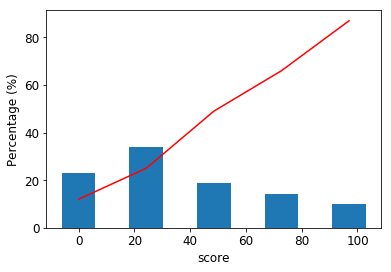

In [6]:
rupPred = RupturaPrediction(X)
rupPred.addLastX(lastX)# Y tem q conveter o formato do Y no do X ou encontrar uma alternativa.
rupPred.validate(Ytest, model)
dataScore = rupPred.calculateDataScore()  # passo que define a validacao
rupPred.plotScore(dataScore)

In [9]:
pred = dataScore.score.tolist()
ytrue = dataScore.Inadimplente.tolist()
ytrue = [int(x) for x in ytrue]
modelIndicators = ModelIndicators(version)
modelIndicators.TARGET_SCORE_CUT = 30
modelIndicators.setPredProbs(ytrue,pred)
indic = modelIndicators.allIndicators()
file = open('ruptura-indicators.csv','a+')
file.write('\n' + 'version;' + version + ';' + 'referenceDate;' + referenceDate + '\n')
for i in range(len(indic)):
    file.write(str(indic.index[i]) + ';' + str(indic.iloc[i,0]) + '\n')
file.close()

# ESTATISTICA DESCRITIVA

In [48]:
allT = [x.split('-') for x in createBatch.titles]
loja = []
prod = []
for t in allT:
    loja.append(t[0])
    prod.append(t[1])
nPontosDeVenda = len(collections.Counter(loja).keys())
nProdutos = len(collections.Counter(prod).keys())
xzao = []
for x in X:
    for xt in x:
        xzao.append(str(xt))
ocorrenciaCounter = collections.Counter(xzao)        